In [1]:
import numpy as np
import cv2

### Load the image

In [2]:
img = cv2.imread("Unsegmented.jpg") #.jpr for colored pictures

In [3]:
type(img)

numpy.ndarray

### Reshape the image

In [4]:
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

### We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV

In [5]:
img2 = np.float32(img2)

### Define criteria, number of clusters and apply k-means

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
## When this criterion is satisfied, the algorithm iteration stops. 
## cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
## cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
## cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
## Max iterations, in this example 10. 
## Epsilon, required accuracy, in this example 1.0

### Number of clusters

In [7]:
k = 4

### Number of attempts, number of times algorithm is executed using different initial labelings.

In [8]:
attempts = 10

### Other flags needed as inputs for K-means to specify how initial seeds are taken. 
##### (cv.KMEANS_PP_CENTERS or cv.KMEANS_RANDOM_CENTERS)

### cv2.kmeans outputs 3 parameters: 
1. Compactness: the sum squared distance forom each point to their corresponding centers

2. Labels: Label array

3. Center: the array of centers of clusters. For k=4 we will have 4  centers

In [9]:
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [10]:
center = np.uint8(center) 

### Now, we have to access the labels to regenerate the clustered image

In [11]:
res = center[label.flatten()]
res2 = res.reshape((img.shape)) #Reshape labels to the size of original image

In [12]:
cv2.imwrite("Segmented.jpg", res2)

True

### Now let us visualize the output result

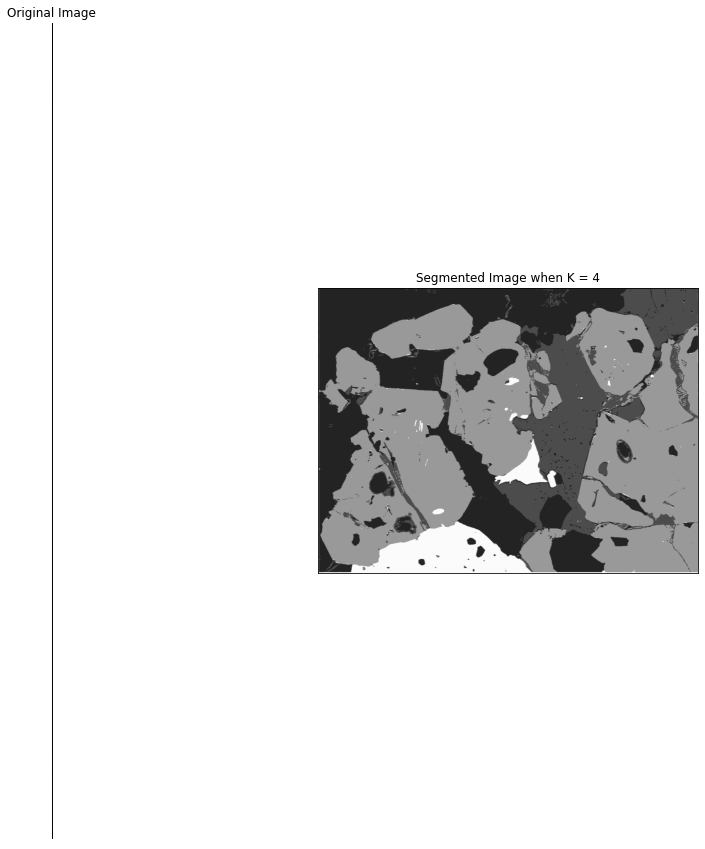

In [13]:
import matplotlib.pyplot as plt
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()